In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
import fasttext
from gensim.models import FastText
from gensim.models import Word2Vec
import gensim
import os
from fasttext import FastVector
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
sns.set_style("darkgrid")
import ast
import itertools
from visualisation import *
from mapping import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.cluster import DBSCAN
from nltk.cluster import KMeansClusterer
import ast
import hdbscan

In [2]:
data=pd.read_csv("result_data.csv", skip_blank_lines=True)
data


,Text,Thématique,Groupe,lang,lang_predict,lemma
0,"['analyse', 'en', 'composantes', 'principales'...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['analyse', 'composante_principal', 'acp', 'pc..."
1,"['il', 'agit', 'une', 'approche', 'à', 'la', '...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['approche', 'géométrique', 'variable', 'repré..."
2,"['outil', 'mathématique', 'est', 'appliqué', '...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['outil', 'mathématique', 'appliquer', 'domain..."
3,"['acp', 'prend', 'sa', 'source', 'dans', 'arti...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['acp', 'source', 'article', 'publier', 'père'..."
4,"['encore', 'connue', 'sous', 'le', 'nom', 'de'...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['connaître', 'transformer', 'karhunenloève', ..."
5,"['les', 'champs', 'application', 'sont', 'aujo...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['champ', 'application', 'biologie', 'recherch..."
6,"['la', 'méthode', 'de', 'décomposition', 'orth...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['méthode', 'décomposition', 'orthogonal', 'pr..."
7,"['dans', 'le', 'une', 'image', 'comme', 'dans'...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['image', 'figure', 'cicontre', 'pixel', 'repr..."
8,"['dans', 'une', 'école', 'imaginaire', 'on', '...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['école', 'imaginaire', 'enseigne', 'matière',..."
9,"['on', 'comprend', 'intérêt', 'de', 'la', 'mét...",Analyse_en_composantes_principales,groupe A,Fr,Fr,"['méthode', 'acp', 'étendre', 'analyse', 'mati..."


In [3]:
#Extract english and frensh corpus
liste_fr=[]
liste_en=[]
for index,row in data.iterrows():
    if row["lang_predict"]=="Fr" :
        liste_fr.append(ast.literal_eval(row["lemma"]))
    else:
        liste_en.append(ast.literal_eval(row["lemma"]))

In [ ]:
show_wordcloud(liste_fr,"fr","fr.png")

In [ ]:
show_wordcloud(liste_en,"en","en.png")

# Word Embedding

In [ ]:
#Word2vec models skipgram
#model_word2vec_fr = Word2Vec(liste_fr, min_count=4,size=300 ,workers=2, window=5, iter=30,sg=1)
#model_word2vec_en = Word2Vec(liste_en, min_count=4,size=300 ,workers=2, window=5, iter=30,sg=1)

In [4]:
#Fasttext models skipgram
model_fasttext_fr= FastText(liste_fr, size=300, window=5, min_count=3, iter=30, sorted_vocab=1,sg=1)


In [7]:
len(liste_fr)

718

In [8]:
len(liste_en)

493

In [5]:
model_fasttext_en= FastText(liste_en, size=300, window=5, min_count=3, iter=30, sorted_vocab=1,sg=1)

In [ ]:
#save models
model_fasttext_fr.save("model_fr.model")
model_fasttext_en.save("model_en.model")

# Visualisation word embedding fr 

C:\Users\dskb5751\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if

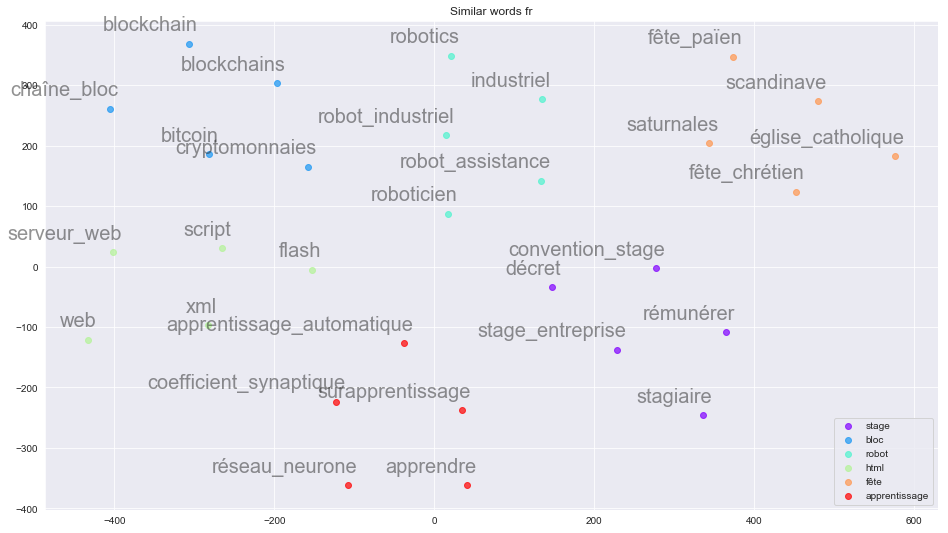

In [39]:
keys = ["stage","bloc","robot","html","fête","apprentissage"]
embedding_clusters_fr = []
word_clusters_fr = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_fasttext_fr.wv.most_similar(word,topn=5):
        words.append(similar_word)
        embeddings.append(model_fasttext_fr[similar_word])
        #print(model_fasttext_fr[similar_word])
    embedding_clusters_fr.append(embeddings)
    word_clusters_fr.append(words)
embedding_clusters_fr = np.array(embedding_clusters_fr)
n, m, k = embedding_clusters_fr.shape
tsne_model_en_2d_fr = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2000, random_state=30)
embeddings_en_2d_fr = np.array(tsne_model_en_2d_fr.fit_transform(embedding_clusters_fr.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words fr', keys, embeddings_en_2d_fr, word_clusters_fr, 0.7,
                        'similar_words_fr.png')

# Visualisation word embedding en 


C:\Users\dskb5751\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D 

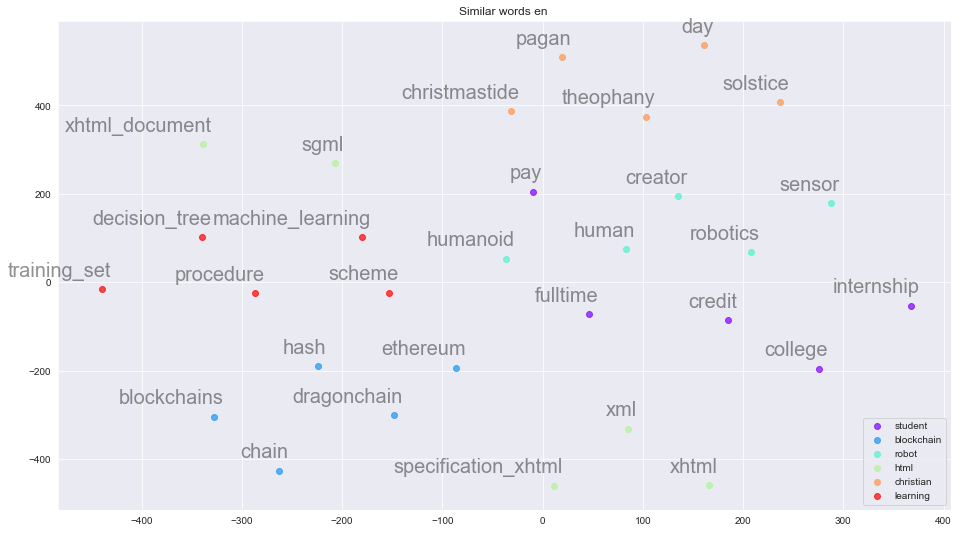

In [38]:
keys = ["student","blockchain","robot","html","christian","learning"]

embedding_clusters_en = []
word_clusters_en = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_fasttext_en.wv.most_similar(word,topn=5):
        words.append(similar_word)
        embeddings.append(model_fasttext_en[similar_word])
    embedding_clusters_en.append(embeddings)
    word_clusters_en.append(words)

embedding_clusters_en = np.array(embedding_clusters_en)
n, m, k = embedding_clusters_en.shape
tsne_model_en_2d_en = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2000, random_state=30)
embeddings_en_2d_en = np.array(tsne_model_en_2d_en.fit_transform(embedding_clusters_en.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words en ', keys, embeddings_en_2d_en, word_clusters_en, 0.7,
                        'similar_words_en.png')

In [ ]:
#save word embeddings word2vec
#model_word2vec_fr.wv.save_word2vec_format('model_word2vec_fr.txt',binary=False)
#model_word2vec_en.wv.save_word2vec_format('model_word2vec_en.txt',binary=False)

In [11]:
#save word embeddings fasttext
model_fasttext_fr.wv.save_word2vec_format('model_fasttext_fr.txt',binary=False)
model_fasttext_en.wv.save_word2vec_format('model_fasttext_en.txt',binary=False)

# Mapping

In [3]:
fr_dictionary = FastVector(vector_file='model_fasttext_fr.txt')
en_dictionary = FastVector(vector_file='model_fasttext_en.txt')

reading word vectors from model_fasttext_fr.txt
reading word vectors from model_fasttext_en.txt


In [4]:
#two corpus of tokens
en_words = set(en_dictionary.word2id.keys())
fr_words = set(fr_dictionary.word2id.keys())

In [5]:
#word_clusters_fr_liste=list(itertools.chain.from_iterable(word_clusters_fr))
#word_clusters_en_liste=list(itertools.chain.from_iterable(word_clusters_en))

In [6]:
#On va faire la réduction de dimension de notre corpus pour pouvoir voir la projection
pca = PCA(n_components=2, whiten=True)  
pca.fit(np.vstack([en_dictionary.embed, fr_dictionary.embed]))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [7]:
#plot_embedding_space(word_clusters_en_liste,en_dictionary.word2id,en_dictionary.embed,word_clusters_fr_liste,fr_dictionary.word2id,fr_dictionary.embed)

In [8]:
#Fonction pour pouvoir lire le dictionnaire de translation
def read_file(fname):
    flist = open(fname,errors="ignore",encoding="utf_8").readlines()
    return [s.rstrip('\n') for s in flist]

dicti=read_file("fr_en_dictionary.txt")
liste=[]
for i in dicti:
    liste.append(i.split(' '))
bilingual_dictionary_translation=[]
for i in liste:
    bilingual_dictionary_translation.append((i[0],i[1]))


In [9]:
#Importation des stopwords
stp_en=read_file("stop-words-en.txt")
stp_fr=read_file("stop-words-fr.txt")

In [10]:
#Enlever les stop words du dicionnaire de translation que j'ai.
liste=[]
for i in bilingual_dictionary_translation:
    if i[0] not in stp_en and i[1] not in stp_fr:
        liste.append((i[0],i[1]))
bilingual_dictionary_translation=liste

In [11]:
#build a dictionary of parallel data 
#parallel data is data which are same in both languages
overlap = list(en_words & fr_words)
bilingual_dictionary = [(entry, entry) for entry in overlap]

In [12]:
#Ajouter le dictionnaire de données paralléles au dictionnaire de translation
bilingual_dictionary_translation+=bilingual_dictionary


In [13]:
# form the training matrices
source_matrix, target_matrix = make_training_matrices(
    en_dictionary, fr_dictionary, bilingual_dictionary_translation)

# learn and apply the transformation
transform = learn_transformation(source_matrix, target_matrix)
en_dictionary.apply_transform(transform)


In [23]:
source_matrix.shape

(577, 300)

In [24]:
target_matrix.shape

(577, 300)

# Projection

In [26]:
#plot_embedding_space(word_clusters_en,en_dictionary.word2id,en_dictionary.embed,word_clusters_fr,fr_dictionary.word2id,fr_dictionary.embed)

TypeError: unhashable type: 'list'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

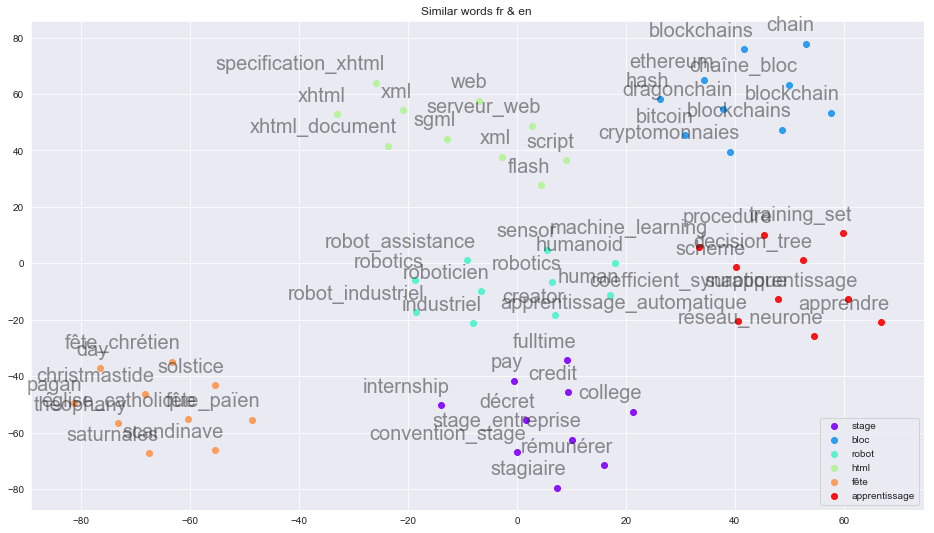

In [40]:
liste_words=[]
liste_embed=[]
for liste1,liste2 in zip(word_clusters_en,word_clusters_fr):
    liste_words.append(liste1+liste2)
    liste_embed.append(np.vstack([[en_dictionary[w1] for w1 in liste1],[fr_dictionary[w2] for w2 in liste2]]))
embedding_clusters =[]
word_clusters = []
for similar_word, sim_embed in zip(liste_words,liste_embed):
    embedding_clusters.append(sim_embed)
    word_clusters.append(similar_word)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=1000, random_state=30)
embeddings_en_2d = np.array(tsne_model_en_2d_en.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words fr & en ', keys, embeddings_en_2d, word_clusters, 0.9,
                        'similar_words_fren.png')

# Validation for each group apart

In [14]:
#Extract english and frensh corpus groups
def extracting(g):
    liste_fr=[]
    liste_en=[]
    for index,row in data.iterrows():
        if row["lang_predict"]=="Fr" and row["Groupe"]==g:
            liste_fr.append(ast.literal_eval(row["lemma"]))
        elif row["lang_predict"]=="En" and row["Groupe"]==g:
            liste_en.append(ast.literal_eval(row["lemma"]))
    return liste_fr,liste_en

In [ ]:
#choose groups
liste_C_fr,liste_C_en=extracting("groupe C")
liste_B_fr,liste_B_en=extracting("groupe B")
liste_A_fr,liste_A_en=extracting("groupe A")
liste_D_fr,liste_D_en=extracting("groupe D")


In [15]:
liste_B_fr,liste_B_en=extracting("groupe B")

In [ ]:
model_fasttext_C_fr= FastText(liste_C_fr, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)
model_fasttext_C_en= FastText(liste_C_en, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1) #sg:skip gram=0 par défaut

In [ ]:
model_fasttext_A_fr= FastText(liste_A_fr, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)
model_fasttext_A_en= FastText(liste_A_en, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)

In [16]:
model_fasttext_B_fr= FastText(liste_B_fr, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)
model_fasttext_B_en= FastText(liste_B_en, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)

In [ ]:
model_fasttext_D_fr= FastText(liste_D_fr, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)
model_fasttext_D_en= FastText(liste_D_en, size=300, window=5, min_count=5, iter=30, sorted_vocab=1,sg=1)

In [ ]:
#######search groups for word "robotique" in fr
import visualisation
from visualisation import *

def groups(keys,models,noun_entities):
    groups=[]
    embedding_clusters= []
    word_clusters= []
    for word in keys:
        group=[]
        words=[]
        embeddings= []
        for model,entity in zip(models,noun_entities):
            if word in model.wv.vocab:
                for similar_word, _ in model.wv.most_similar(word,topn=10):
                    words.append(similar_word)
                    embeddings.append(model[similar_word])
                group.append(entity)
            else:
                group.append("")
            if len(embeddings)!=0:
                embedding_clusters.append(embeddings)
            else:
                embedding_clusters.append([np.zeros([300,])]*10)

            if len(words)!=0:
                word_clusters.append(words)
            else:
                word_clusters.append([''] * 10)
    return word_clusters,embedding_clusters,group

In [ ]:
#searching groups where exists "robotique" in fr
keys_fr=["fête"]
models_fr=[model_fasttext_A_fr]
noun_entities_fr=["A"]
word_clusters_fr,embedding_clusters_fr,group=groups(keys_fr,models_fr,noun_entities_fr)
embedding_clusters_fr = np.array(embedding_clusters_fr)
n, m, k = embedding_clusters_fr.shape
tsne_model_en_2d_fr = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2000, random_state=30)
embeddings_en_2d_fr = np.array(tsne_model_en_2d_fr.fit_transform(embedding_clusters_fr.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words fr for "robotique"', group, embeddings_en_2d_fr, word_clusters_fr, 0.7,
                        'groups_robotique.png')

In [ ]:
#searching groups for word "data"in en
keys_en=["data"]
models_en=[model_fasttext_A_en,model_fasttext_B_en,model_fasttext_C_en,model_fasttext_D_en]
noun_entities=["A","B","C","D"]
word_clusters_en,embedding_clusters_en=groups(keys_en,models_en,noun_entities_en)
embedding_clusters_en = np.array(embedding_clusters_en)
n, m, k = embedding_clusters_en.shape
tsne_model_en_2d_en= TSNE(perplexity=5, n_components=2, init='pca', n_iter=2000, random_state=30)
embeddings_en_2d_en= np.array(tsne_model_en_2d_en.fit_transform(embedding_clusters_en.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words en for "data"', group, embeddings_en_2d_en, word_clusters_en, 0.7,
                        'groups_data.png')

In [ ]:
from numpy import zeros

liste_words=[]
liste_embed=[]
groups=[]

for liste1,liste2,g1,g2 in zip(word_clusters_en,word_clusters_fr,group_en,group):
    liste_words.append(liste1+liste2)
    liste_embed.append([en_dictionary[w1] if w1 in en_words else zeros([300,]) for w1 in liste1]+[fr_dictionary[w2] if w2 in fr_words else zeros([300,]) for w2 in liste2])
    groups.append(g1+g2)
embedding_clusters =[]
word_clusters = []
groupss=[]
for similar_word, sim_embed,g in zip(liste_words,liste_embed,groups):
    embedding_clusters.append(sim_embed)
    word_clusters.append(similar_word)
    groupss.append(g)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2000, random_state=30)
embeddings_en_2d = np.array(tsne_model_en_2d_en.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words fr & en par groupe ', groupss, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_fren.png')

In [ ]:
'''keys = ["composante_principale","fête","stage"]

embedding_clusters_fr = []
word_clusters_fr = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_fasttext_A_fr.wv.most_similar(word,topn=7):
        words.append(similar_word)
        embeddings.append(model_fasttext_A_fr[similar_word])
    embedding_clusters_fr.append(embeddings)
    word_clusters_fr.append(words)

embedding_clusters_fr = np.array(embedding_clusters_fr)
n, m, k = embedding_clusters_fr.shape
tsne_model_en_2d_fr= TSNE(perplexity=9, n_components=2, init='pca', n_iter=2000, random_state=30)
embeddings_en_2d_fr = np.array(tsne_model_en_2d_fr.fit_transform(embedding_clusters_fr.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words('Similar words A fr ', keys, embeddings_en_2d_fr, word_clusters_fr, 0.7,
                        'similar_words_A_fr.png')'''

In [ ]:
#Y=np.vstack([[en_dictionary[w1] for w1 in word_clusters_en],[fr_dictionary[w2] for w2 in word_clusters_fr]])

# Clustering

In [ ]:
Y=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_fr.wv.vocab)]])

In [ ]:
YA=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_A_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_A_fr.wv.vocab)]])

In [17]:
YB=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_B_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_B_fr.wv.vocab)]])

In [ ]:
YC=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_C_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_C_fr.wv.vocab)]])

In [ ]:
YD=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_D_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_D_fr.wv.vocab)]])

In [ ]:
pca = PCA(n_components=2, whiten=True)  
pca.fit(Y)
Y=pca.transform(Y)

In [ ]:
pca = PCA(n_components=2, whiten=True)  
pca.fit(YC)
YC=pca.transform(YC)

In [ ]:
pca.fit(YA)
YA=pca.transform(YA)

In [18]:
pca.fit(YB)
YB=pca.transform(YB)

In [ ]:
pca.fit(YD)
YD=pca.transform(YD)

In [ ]:
#function to know the optimal K
def validity_index(c,Y):
    kmeans=KMeans(init="k-means++",n_clusters=c,random_state=0)
    
    kmeans.fit(Y)
    #mu_i is the centers of clusters
    mu_i=kmeans.cluster_centers_
    k_means_labels=kmeans.labels_
    #mu is the center of the whole dataset
    mu=Y.mean(axis=0)
    #initialize the between clusters matrix
    SB=np.zeros((2,2))
    for line in mu_i:
        diff1=line.reshape(1,2)-mu.reshape(1,2)
        diff2=np.transpose(line.reshape(1,2)-mu.reshape(1,2))
        SB+=diff1*diff2
    comp_c=0
    #initialize the within matrix
    Sw=np.zeros((2,2))
    sum_in_cluster=np.zeros((2,2))
    for k in range(c):
        mes_points=(k_means_labels==k)
        cluster_center=mu_i[k]
        for i in Y[mes_points]:
            diff11=i.reshape(1,2)-cluster_center.reshape(1,2)
            diff22=np.transpose(i.reshape(1,2)-cluster_center.reshape(1,2))
            sum_in_cluster+=diff11*diff22
        Sw+=sum_in_cluster
        #calculate the compactness in each cluster
        comp_c+=np.trace(Sw)
    #define the separation between clusters
    sep_c=np.trace(SB)
    #determin the Vsc
    Vsc=sep_c/comp_c
    return Vsc


In [ ]:
#We have to find that the max Vsc is for the n_cluster defined initially
Vsc_vector=[]
cc=[2,3,4,5,6,7,8,9]
for i in cc:
    Vsc_vector.append(validity_index(i,YA))
print("Number of clusters which has max of Vsc:",Vsc_vector.index(max(Vsc_vector)) ,"=> Vsc=",max(Vsc_vector))

In [ ]:
Vsc_vector=[]
cc=[2,3,4,5,6,7,8,9]
for i in cc:
    Vsc_vector.append(validity_index(i,YB))
print("Number of clusters which has max of Vsc:",Vsc_vector.index(max(Vsc_vector)) ,"=> Vsc=",max(Vsc_vector))

In [ ]:
Vsc_vector=[]
cc=[2,3,4,5,6,7,8,9]
for i in cc:
    Vsc_vector.append(validity_index(i,YC))
print("Number of clusters which has max of Vsc:",Vsc_vector.index(max(Vsc_vector)) ,"=> Vsc=",max(Vsc_vector))

In [ ]:
Vsc_vector=[]
cc=[2,3,4,5,6,7,8,9]
for i in cc:
    Vsc_vector.append(validity_index(i,YD))
print("Number of clusters which has max of Vsc:",Vsc_vector.index(max(Vsc_vector)) ,"=> Vsc=",max(Vsc_vector))

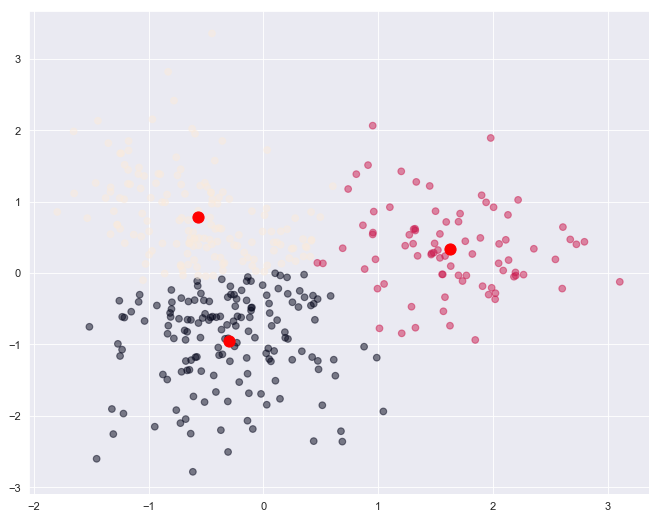

In [19]:
kmeans = cluster.KMeans(n_clusters=3)
YB=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_B_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_B_fr.wv.vocab)]])
pca = PCA(n_components=2, whiten=True)  
pca.fit(YB)
YB=pca.transform(YB)
kmeans.fit(YB)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
x_coords=YB[:,0]
y_coords=YB[:,1]

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(x_coords,y_coords, c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)


3 student
3 league
2 gsm
1 develop
1 telecommunication
1 standard
2 protocol
2 network
2 phone
2 deploy
2 share
2 operate
2 country
2 gsm_standard
2 voice
3 time
2 data
2 radio
2 service
2 gprs
2 rate
2 umts
3 follow
3 form
3 association
3 refer
3 committee
1 provide
0 base
3 representative
3 rule
3 pass
2 support
2 operator
2 gsm_network
3 period
2 development
2 mhz
3 city
2 frequency_band
2 launch
2 gsm_subscriber
2 handset
2 technology
3 introduce
3 account
2 access
0 version
3 people
3 code
3 adopt
2 software
2 shut
1 cover
1 cell
1 coverage
0 accord
1 antenna
1 design
2 business
0 depend
1 type
2 frequency
3 divide
2 channel
2 kbit
0 feature
3 change
2 implement
2 hack
2 attack
2 algorithm
1 break
3 start
2 source
0 conversation
3 remain
0 term
1 patent
0 citation
0 robot
1 hanson
1 interview
1 citizenship
0 nation
0 innovation
1 intelligence
0 question
1 response
0 event
3 attempt
3 goal
3 britain
3 strike
3 watch
3 record
3 field
3 football
3 team
3 sport
3 involve
3 kick
3 word

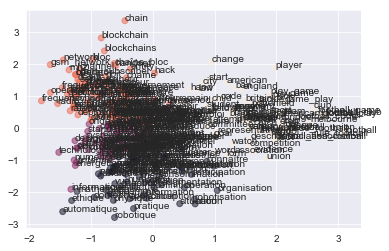

In [22]:
Y=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_B_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_B_fr.wv.vocab)]])#Y = StandardScaler().fit_transform(Y)
pca = PCA(n_components=2, whiten=True)  
pca.fit(Y)
Y=pca.transform(Y)
words=list(model_fasttext_B_en.wv.vocab)+list(model_fasttext_B_fr.wv.vocab)
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=200)
assigned_clusters = kclusterer.cluster(Y, assign_clusters=True)

plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, alpha=.5)
for j in range(len(words)):    
    plt.annotate(xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points',s=words[j])
    print ("%s %s" % (assigned_clusters[j],  words[j]))
plt.show()


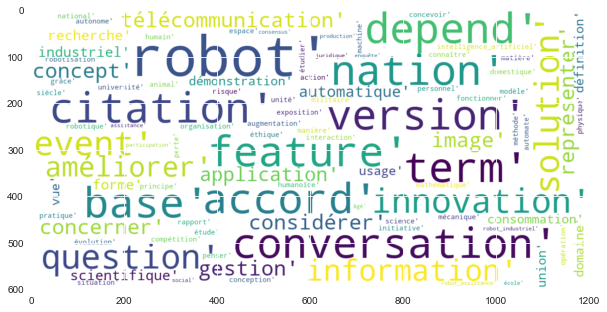

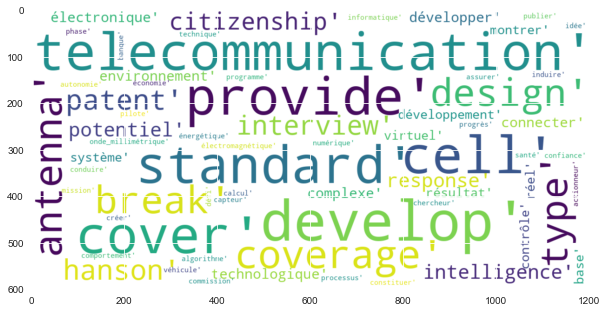

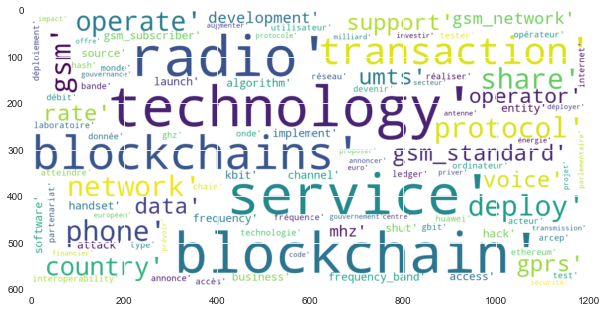

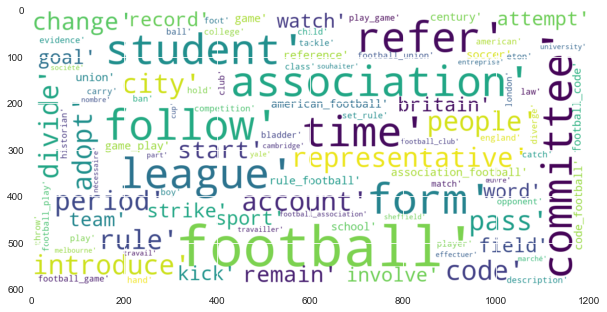

In [23]:
plt.figure(1,figsize=(10, 10))

aux0=[]
for k, (l,label) in enumerate(zip(assigned_clusters,words)):
    if l==0:
        aux0.append(label)
show_wordcloud2(aux0)
plt.show()
plt.figure(2,figsize=(10, 10))

aux1=[]
for k, (l,label) in enumerate(zip(assigned_clusters,words)):
    if l==1:
        aux1.append(label)
show_wordcloud2(aux1)
plt.show()
plt.figure(3,figsize=(10, 10))

aux2=[]
for k, (l,label) in enumerate(zip(assigned_clusters,words)):
    if l==2:
        aux2.append(label)
show_wordcloud2(aux2)
plt.show()
plt.figure(4,figsize=(10, 10))

aux3=[]
for k, (l,label) in enumerate(zip(assigned_clusters,words)):
    if l==3:
        aux3.append(label)
show_wordcloud2(aux3)
plt.show()



In [ ]:
len(liste_en+liste_fr)

In [ ]:
#####hdbscan######################################################
Y=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_A_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_A_fr.wv.vocab)]])
pca.fit(Y)
Y=pca.transform(Y)

#leaf :This will select leaf nodes from the tree, producing many small homogeneous clusters.
#Note that you can still get variable density clusters via this method, and it is also still possible to get large clusters,
#but there will be a tendency to produce a more fine grained clustering than Excess of Mass can provide.
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(Y)
labels=clusterer.labels_
plt.scatter(Y[:,0], Y[:,1], c=labels)
labels

In [ ]:
clusterer.labels_.max()

In [ ]:
words=list(model_fasttext_en.wv.vocab)+list(model_fasttext_fr.wv.vocab)
aux=[]
for k, (l,label) in enumerate(zip(labels,words)):
    if l==4:
        aux.append(label)
show_wordcloud2(aux)

In [ ]:
###########DBSCAN###########################""
sns.set()
Y=np.vstack([[en_dictionary[w1] for w1 in list(model_fasttext_A_en.wv.vocab)],[fr_dictionary[w2] for w2 in list(model_fasttext_A_fr.wv.vocab)]])
pca.fit(Y)
Y=pca.transform(Y)
neigh = NearestNeighbors(n_neighbors=2, metric="cosine")
nbrs = neigh.fit(Y)
distances, indices = nbrs.kneighbors(Y)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [ ]:
#A low minPts means it will build more clusters from noise
#
m = DBSCAN(eps=0.0005, min_samples=2, metric="cosine")
m.fit(Y)
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(Y[:,0], Y[:,1], c=vectorizer(clusters))



In [ ]:
clusters

In [ ]:
words=list(model_fasttext_A_en.wv.vocab)+list(model_fasttext_A_fr.wv.vocab)
aux=[]
for k, (l,label) in enumerate(zip(clusters,words)):
    if l==5:
        aux.append(label)
show_wordcloud2(aux)

# Algorithm evaluation 

In [ ]:
f=open("traduction_accent.txt","r",errors="ignore")
lines=f.readlines()
result_en=[]
result_fr=[]

for x in lines:
    result_en.append(x.split(' ')[0])
    result_fr.append(x.split(' ')[1].rstrip())
cosine=[]
for i,j in zip(result_en,result_fr):
    if i in en_words and j in fr_words:
        cosine.append(FastVector.cosine_similarity(fr_dictionary[j],en_dictionary[i]))
np.mean(cosine)

In [ ]:
m=len(result_fr)
n=len(result_en)
distances = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        distances[i,j] = FastVector.cosine_similarity(fr_dictionary[result_fr[j]],en_dictionary[result_en[i]])


In [ ]:
 fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(distances,cmap=cm.get_cmap('Blues'))
ax.grid(False)
plt.title('Cosine Similarity matrix',y=-0.1,size=20)
plt.xticks(range(len(result_en)), result_en, rotation=90,size=20)
plt.yticks(range(len(result_fr)), result_fr,size=20)
fig.colorbar(cax, ticks=[0.1, 0.5,.6,.7,.8,.9,1])
plt.show()